In [1]:
import numpy as np
import pandas as pd
import random as rnd
from numpy import linalg as la
import time
import matplotlib.pyplot as plt
import datetime
import pickle

# Random package parameter
SEED = 666
rnd.seed(SEED)

#graphics parameters of the notebook
# display graphs inline
%matplotlib inline
# Make the fonts bigger
plt.rc('figure', figsize=(14, 7))
plt.rc('font', family='normal', weight='bold', size=15)

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


## 1. All models without regularization

### Data integration

In [2]:
B0_test = [0.947444815497, 0.9286483163, 0.939765098234, 
           0.96499378487, 0.995300951492, 1.0292145271, 
           1.04907362542, 1.10983618256]

B0_train = [0.912930051092, 0.859770802682, 0.827771254358,
           0.811918552033, 0.809881062652, 0.805785164336, 
            0.79975082572, 0.772069691058]

with open('B_noreg_results.pkl', 'rb') as input:
    B_test = pickle.load(input)
    B_train = pickle.load(input)  

with open('BT_noreg_results.pkl', 'rb') as input:
    BT_test = pickle.load(input)
    BT_train = pickle.load(input)
B0_test

[0.947444815497,
 0.9286483163,
 0.939765098234,
 0.96499378487,
 0.995300951492,
 1.0292145271,
 1.04907362542,
 1.10983618256]

### Visualization

/usr/local/lib/python3.4/dist-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


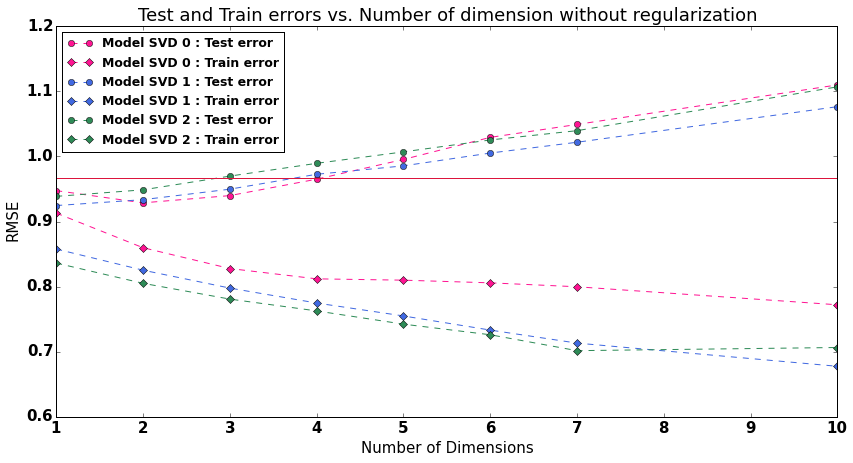

In [83]:
ndims = [1, 2, 3, 4, 5, 6, 7, 10]

fig = plt.figure()
plt.plot(ndims, B0_test, linestyle="dashed", marker="o", color='deeppink')
plt.plot(ndims, B0_train, linestyle="--", marker="D", color='deeppink')
plt.plot(ndims, B_test, linestyle="--", marker="o", color='royalblue')
plt.plot(ndims, B_train, linestyle="--", marker="D", color='royalblue')
plt.plot(ndims, BT_test, linestyle="--", marker="o", color='seagreen')
plt.plot(ndims, BT_train, linestyle="--", marker="D", color='seagreen')
plt.title("Test and Train errors vs. Number of dimension without regularization")
plt.xlabel("Number of Dimensions")
plt.ylabel("RMSE")
plt.legend(["Model SVD 0 : Test error", "Model SVD 0 : Train error", 
            "Model SVD 1 : Test error", "Model SVD 1 : Train error",
            "Model SVD 2 : Test error", "Model SVD 2 : Train error"], 2, fontsize='small')
plt.axhline(y=0.966803427233, xmin=0, xmax=20, linewidth=1, color='crimson')


## Model B : Influence of regularization parameter over Overall Performances

In [3]:
with open('B_reg_results.pkl', 'rb') as input:
    B_reg_test = pickle.load(input)
    B_reg_train = pickle.load(input)

B_reg_00_test = []
B_reg_01_test = []
B_reg_02_test = []
B_reg_03_test = []
B_reg_04_test = []
B_reg_05_test = []

for key in sorted(B_reg_test.keys()):
    if key[1] == 0.0:
        B_reg_00_test.append(B_reg_test[key])
    if key[1] == 0.1:
        B_reg_01_test.append(B_reg_test[key])
    if key[1] == 0.2:
        B_reg_02_test.append(B_reg_test[key])
    if key[1] == 0.3:
        B_reg_03_test.append(B_reg_test[key])
    if key[1] == 0.4:
        B_reg_04_test.append(B_reg_test[key])
    if key[1] == 0.5:
        B_reg_05_test.append(B_reg_test[key])

B_reg_00_train = []
B_reg_01_train = []
B_reg_02_train = []
B_reg_03_train = []
B_reg_04_train = []
B_reg_05_train = []

for key in sorted(B_reg_train.keys()):
    if key[1] == 0.0:
        B_reg_00_train.append(B_reg_train[key])
    if key[1] == 0.1:
        B_reg_01_train.append(B_reg_train[key])
    if key[1] == 0.2:
        B_reg_02_train.append(B_reg_train[key])
    if key[1] == 0.3:
        B_reg_03_train.append(B_reg_train[key])
    if key[1] == 0.4:
        B_reg_04_train.append(B_reg_train[key])
    if key[1] == 0.5:
        B_reg_05_train.append(B_reg_train[key])

/usr/local/lib/python3.4/dist-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


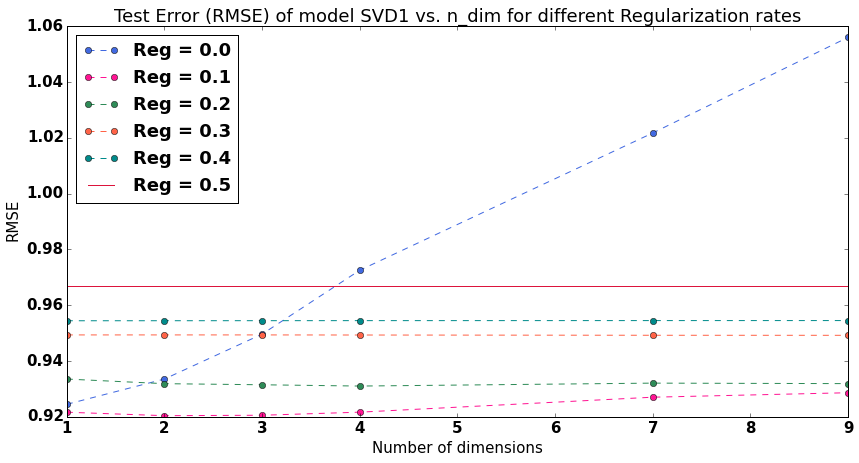

In [4]:
ndims = [1, 2, 3, 4, 7, 9]

fig = plt.figure()
plt.plot(ndims, B_reg_00_test, linestyle="dashed", marker="o", color='royalblue')
plt.plot(ndims, B_reg_01_test, linestyle="dashed", marker="o", color='deeppink')
plt.plot(ndims, B_reg_02_test, linestyle="dashed", marker="o", color='seagreen')
plt.plot(ndims, B_reg_03_test, linestyle="dashed", marker="o", color='tomato')
plt.plot(ndims, B_reg_04_test, linestyle="dashed", marker="o", color='darkcyan')
plt.axhline(y=0.966803427233, xmin=0, xmax=20, linewidth=1, color='crimson')

plt.title('Test Error (RMSE) of model SVD1 vs. n_dim for different Regularization rates')
plt.xlabel('Number of dimensions')
plt.ylabel('RMSE')
plt.legend(['Reg = 0.0', 'Reg = 0.1', 'Reg = 0.2', 'Reg = 0.3', 'Reg = 0.4', 'Reg = 0.5'], 2)

/usr/local/lib/python3.4/dist-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


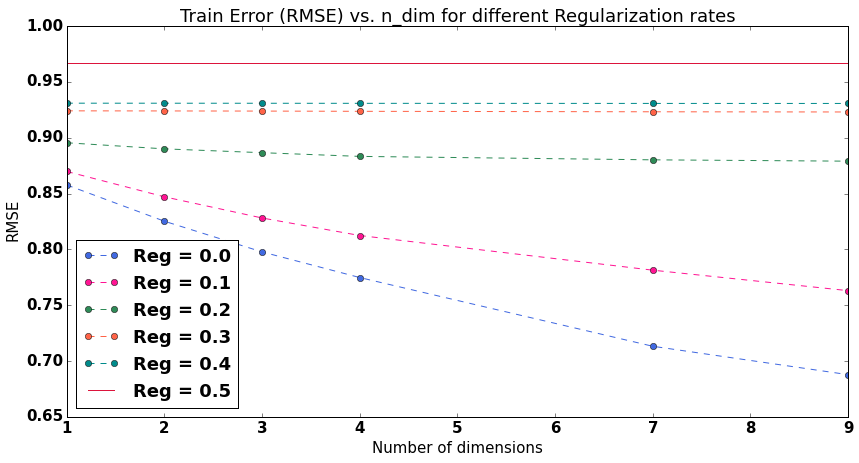

In [5]:
fig = plt.figure()
plt.plot(ndims, B_reg_00_train, linestyle="dashed", marker="o", color='royalblue')
plt.plot(ndims, B_reg_01_train, linestyle="dashed", marker="o", color='deeppink')
plt.plot(ndims, B_reg_02_train, linestyle="dashed", marker="o", color='seagreen')
plt.plot(ndims, B_reg_03_train, linestyle="dashed", marker="o", color='tomato')
plt.plot(ndims, B_reg_04_train, linestyle="dashed", marker="o", color='darkcyan')
plt.title('Train Error (RMSE) vs. n_dim for different Regularization rates')
plt.axhline(y=0.966803427233, xmin=0, xmax=20, linewidth=1, color='crimson')

plt.xlabel('Number of dimensions')
plt.ylabel('RMSE')
plt.legend(['Reg = 0.0', 'Reg = 0.1', 'Reg = 0.2', 'Reg = 0.3', 'Reg = 0.4', 'Reg = 0.5'], 3)